# DATA ANALYSIS OF E-COMMERCE REAL TIME DATA 

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),  # Added payments.csv for specific handling
    ('order_items.csv','order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='faizan@1234#',
    database='yt_ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r'C:\Users\FAIZAN\OneDrive\Desktop\Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64



KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# connecting to the database
db = mysql.connector.connect(host = 'localhost',
                            username = "root",
                            password = "faizan@1234#",
                            database = "yt_ecommerce")

cur = db.cursor()  # start the cursor in the database 


# Basic level questions :-  

# 1.List all the unique cities where customers are located 

In [2]:
query = """ select distinct customer_state from customers """

cur.execute(query)

data = cur.fetchall()

In [3]:
data

[('SP',),
 ('SC',),
 ('MG',),
 ('PR',),
 ('RJ',),
 ('RS',),
 ('PA',),
 ('GO',),
 ('ES',),
 ('BA',),
 ('MA',),
 ('MS',),
 ('CE',),
 ('DF',),
 ('RN',),
 ('PE',),
 ('MT',),
 ('AM',),
 ('AP',),
 ('AL',),
 ('RO',),
 ('PB',),
 ('TO',),
 ('PI',),
 ('AC',),
 ('SE',),
 ('RR',)]

In [4]:
cur.execute("select distinct customer_city from customers")

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2.Count the number of orders placed in 2017

In [5]:
query = """ select count(order_id) 
from orders 
where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
data

[(45101,)]

# 3.Find the total sales for each category

In [15]:
query = """ select products.product_category , round(sum(payments.payment_value),2)
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category
"""

cur.execute(query)

data = cur.fetchall()

data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('Fashion Bags and Accessories', 218158.28),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

# 4.Calculate the percantage oof orders that were paid in installments

In [11]:
query ="""select round((sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100 , 3) from payments
"""

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('99.998'),)]

# 5.Count the number of customers from each state 

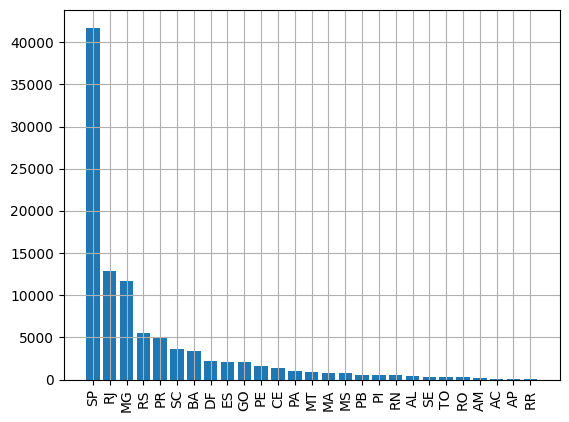

<Figure size 800x300 with 0 Axes>

In [42]:
query ="""select customer_state,count(customer_id) 
from customers 
group by customer_state 
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns =['State','Customer Count'])

df = df.sort_values(by= 'Customer Count', ascending = False)

plt.bar(df["State"],df["Customer Count"])
plt.xticks(rotation = 90)
plt.grid(True)
plt.figure(figsize = (8,3))
plt.show()


# .Intermidiate Queries 

# 1.Calculate the numbers of orders per month in 2018 

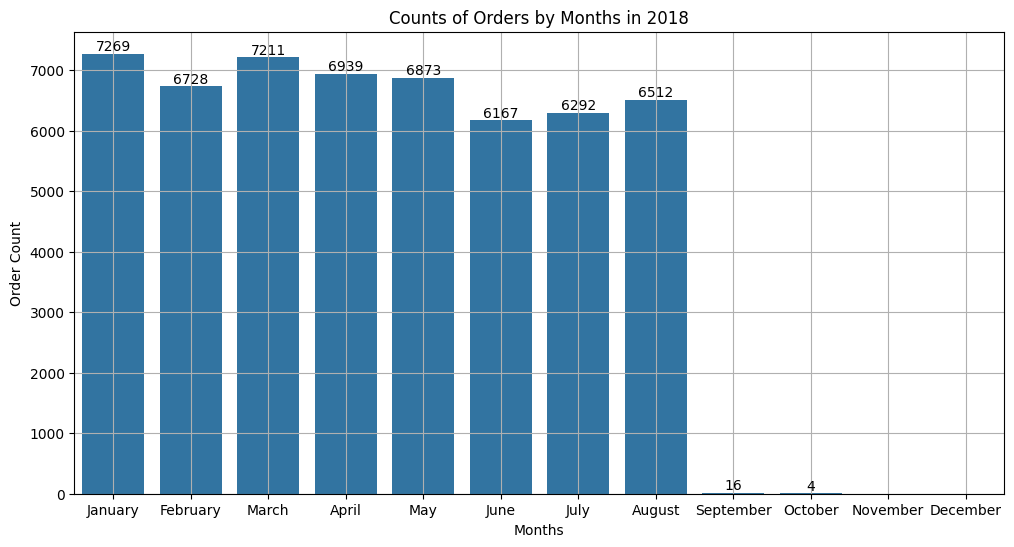

In [27]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders  where year(order_purchase_timestamp) = 2018 
group by months
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['Months','Order Count'])
# df = df.sort_values(by="Months")# shows the incorrect input because A come first in Alphabets

# plt.bar(df['Months'],df['Order Count'])
# plt.show()

plt.figure(figsize=(12, 6))
ord = ['January','February','March', 'April' , 'May', 'June', 'July' ,'August' , 'September' , 'October' ,'November' , 'December']
ax = sns.barplot(x = df['Months'], y = df['Order Count'] , order = ord)
plt.grid(True)

ax.bar_label(ax.containers[0]) # shows the values on teh each bar 

plt.title('Counts of Orders by Months in 2018')

plt.show()


# 2.Find the Average Number of products per order, group by customer city 

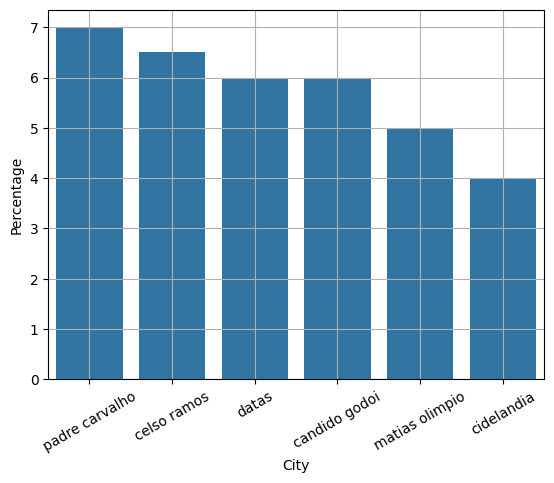

<Figure size 3000x1000 with 0 Axes>

,City,Average Product Per Order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


In [22]:
query = """ with count_per_order as (select orders.order_id , orders.customer_id , count(order_items.order_id) as Oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city , round(avg(count_per_order.Oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['City','Percentage'])
df= df.head(6)

sns.barplot(x= df['City'],y=df['Percentage'])
plt.xticks(rotation = 30)
plt.grid(True)
plt.figure(figsize=(30,10))
plt.show()

df = pd.DataFrame(data,columns=['City','Average Product Per Order'])
df.head(20)

# 3.Calculate the percentage of total revenue contributed by each product category 

In [33]:
query = """ select products.product_category , round(((sum(payments.payment_value))/(select sum(payment_value) from payments)) *100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category order by sales_percentage desc


"""

cur.execute(query)

data = cur.fetchall()
df= pd.DataFrame(data,columns = ['Product Category', 'Average Product Sale'])
df.head(15)

,Product Category,Average Product Sale
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


# 4.Identify the correlation between product price and the number of times a product has been purchased 

In [43]:
query= """ select products.product_category , count(order_items.product_id) , round(avg(order_items.price),2) Average
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category order by Average desc"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data,columns=['Category','Order Count','Average Price'])
df.head(10)

#finding corelation

arr1 = df['Order Count']
arr2 = df['Average Price']

np.corrcoef([arr1,arr2])


#conclusion there is no particular correlation between the purchases and the average of the price for each category 


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# 5.Calculate the total reveneue generated by each saler and give them ranking

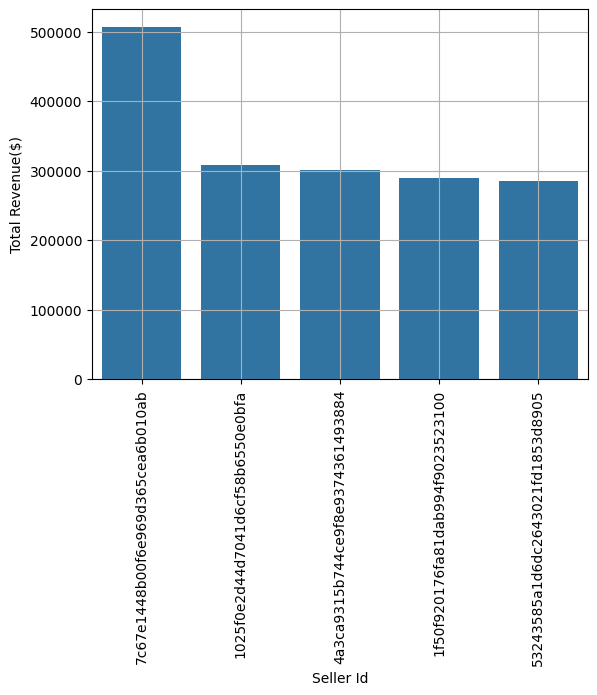

In [22]:
query = """ select * , dense_rank() over (order by revenue desc) as ran from 
(select order_items.seller_id , round(sum(payments.payment_value),2) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id ) as a"""

cur.execute(query)
data = cur.fetchall()
# data
df = pd.DataFrame(data , columns = ['Seller Id','Total Revenue($)','Rank'])
df = df.head(5)

sns.barplot(x = 'Seller Id' , y = 'Total Revenue($)', data = df)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

# Advance Queries

# 1.Calculate the Moving average of order values for each customer over thier order history 

In [29]:
query = """ select customer_id , order_purchase_timestamp , payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_avg from
(select orders.customer_id , orders.order_purchase_timestamp, payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns = ['Customer Id','Purchase Time','Payments','Average Moving Price'])
df.head(30)



,Customer Id,Purchase Time,Payments,Average Moving Price
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800003
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400002
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.589996
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230003
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.709961


# 2.Calculate the cumulative sales per month for each year 

In [35]:
query = """
select year(orders.order_purchase_timestamp) as years , month(orders.order_purchase_timestamp) as months, 
round(sum(payments.payment_value),2)
from orders join payments 
on orders.order_id = payments.order_id
group by years,months order by years,months asc
"""

#cumulative sales  : meaning day-1 i earn 200 in day-2 i earn 300 meaning total of 500 , and in day-3 i earn 200 so that the total is 700


cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['Years','Months','Cumulative Sales'])
df

,Years,Months,Cumulative Sales
0,2016,9,252.24
1,2016,10,59090.48
2,2016,12,19.62
3,2017,1,138488.04
4,2017,2,291908.01
5,2017,3,449863.60
6,2017,4,417788.03
7,2017,5,592918.82
8,2017,6,511276.38
9,2017,7,592382.92


# 3.Calculate the year-over-year growth rate of total sales 

In [2]:
query = """with a as
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as TotalSales 
from orders join payments
on orders.order_id = payments.order_id
group by years )

select years,TotalSales,round((TotalSales - lag(TotalSales,1) over(order by years))/lag(TotalSales,1) over (order by years),2) *100 from a
"""

# (current year sales - previous year sales) / previous year sales * 100

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['Years', 'Total Sales','Year Growth Percentage'])
df

,Years,Total Sales,Year Growth Percentage
0,2016,59362.34,NaN
1,2017,7249746.73,12113.0
2,2018,8699763.05,20.0


# 4.Calculate the retention rate of customers , defined as the percentage of customers who make another purcahse within 6  months of thier first purchase 

In [14]:
query = """ with a as 
(select customers.customer_id , min(orders.order_purchase_timestamp) as first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id) 
select a.customer_id , count(distinct orders.order_purchase_timestamp)
from a join orders
on a.customer_id = orders.customer_id
and a.first_order < orders.order_purchase_timestamp
and orders.order_purchase_timestamp < date_add(a.first_order, interval 12 month)
group by a.customer_id """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data)
df.head(10)

# Conclusion is that there is no customer that purhcases any other order than the first within 6 months 

# in data there is no cutomer that placed any order second time

""


# 5.Identify the top three customers who spent the most money in each year 

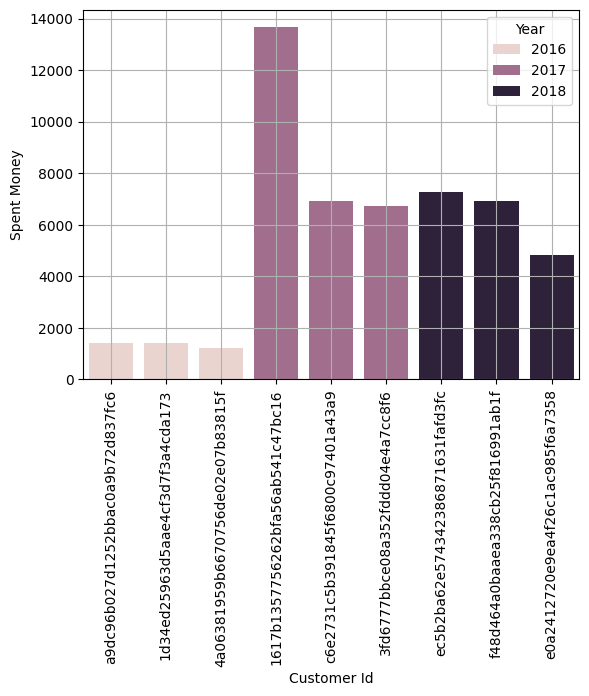

In [42]:
query = """ select year , customer_id , payment ,d_rank from
(select year(orders.order_purchase_timestamp) year, orders.customer_id , sum(payments.payment_value) as payment,
dense_rank() over ( partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value ) desc) d_rank
from orders join payments
on orders.order_id = payments.order_id
group by orders.customer_id, year ) as a 
where d_rank <= 3
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns = ['Year' , 'Customer Id' ,'Spent Money' , 'Rank by Money Spent'])

sns.barplot(x = 'Customer Id', y = 'Spent Money' , data = df, hue = 'Year')
plt.xticks(rotation = 90)
plt.grid()
plt.show()